In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [35]:
df = pd.read_csv('disney_plus_titles.csv')
type(df)

pandas.core.frame.DataFrame

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [37]:
df.tail() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


In [38]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1450 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [40]:
df.isnull().sum()


show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

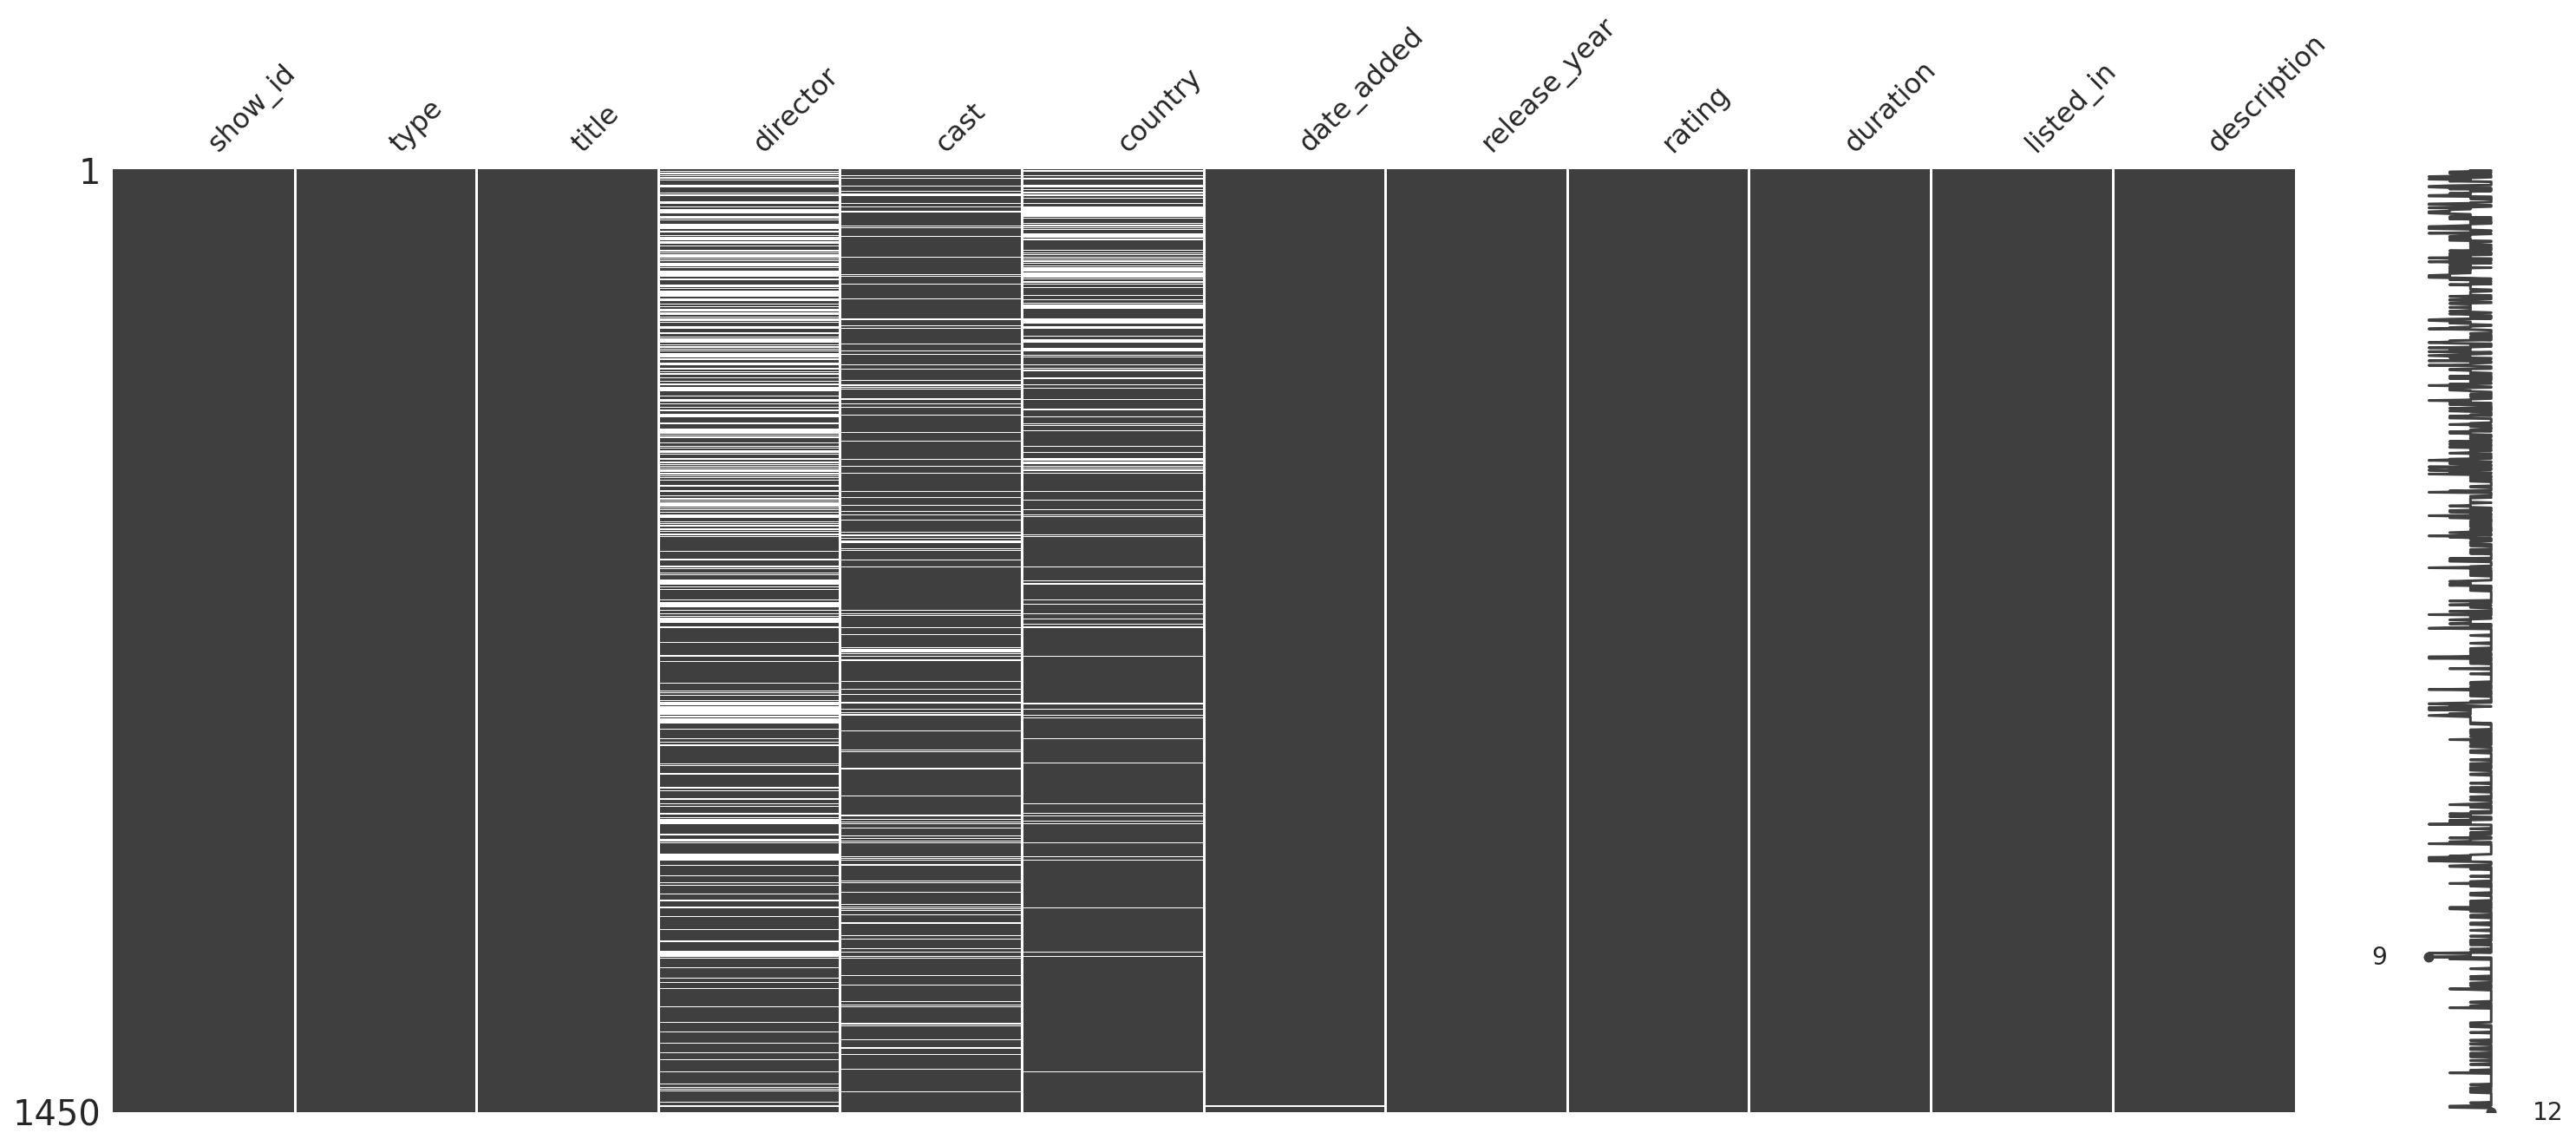

In [41]:
msno.matrix(df)
plt.show()

**결측치 현황**
show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0

**결측치 처리**

    o rating : 검색해서 직접 채워 넣는 방법
        - [The Beatles: Get Back](https://www.imdb.com/title/tt9735318/) -> PG-13
        - [Disney My Music Story: Perfume -> TV-14
        - Marvel Studios ASSEMBLED -> TV-14

**주요항목별 set**
type              2 {'Movie', 'TV Show'}
rating            9 {'G', 'PG', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV'}



In [42]:
df['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

In [43]:
df_copy = df.copy()

In [44]:
df_copy['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

In [45]:
len(set(df_copy['type']))

2

In [46]:
len(set(df_copy['rating']))

9

In [47]:
set(df_copy['rating'])

{'G', 'PG', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV'}

In [48]:
set(df_copy['type'])

{'Movie', 'TV Show'}

In [49]:
counts = df_copy.groupby(['type', 'rating']).size().reset_index(name='count')
print(counts)

       type    rating  count
0     Movie         G    253
1     Movie        PG    235
2     Movie     PG-13     66
3     Movie     TV-14     38
4     Movie      TV-G    233
5     Movie     TV-PG    181
6     Movie      TV-Y      3
7     Movie     TV-Y7     36
8     Movie  TV-Y7-FV      7
9   TV Show        PG      1
10  TV Show     PG-13      1
11  TV Show     TV-14     43
12  TV Show      TV-G     85
13  TV Show     TV-PG    120
14  TV Show      TV-Y     47
15  TV Show     TV-Y7     95
16  TV Show  TV-Y7-FV      6


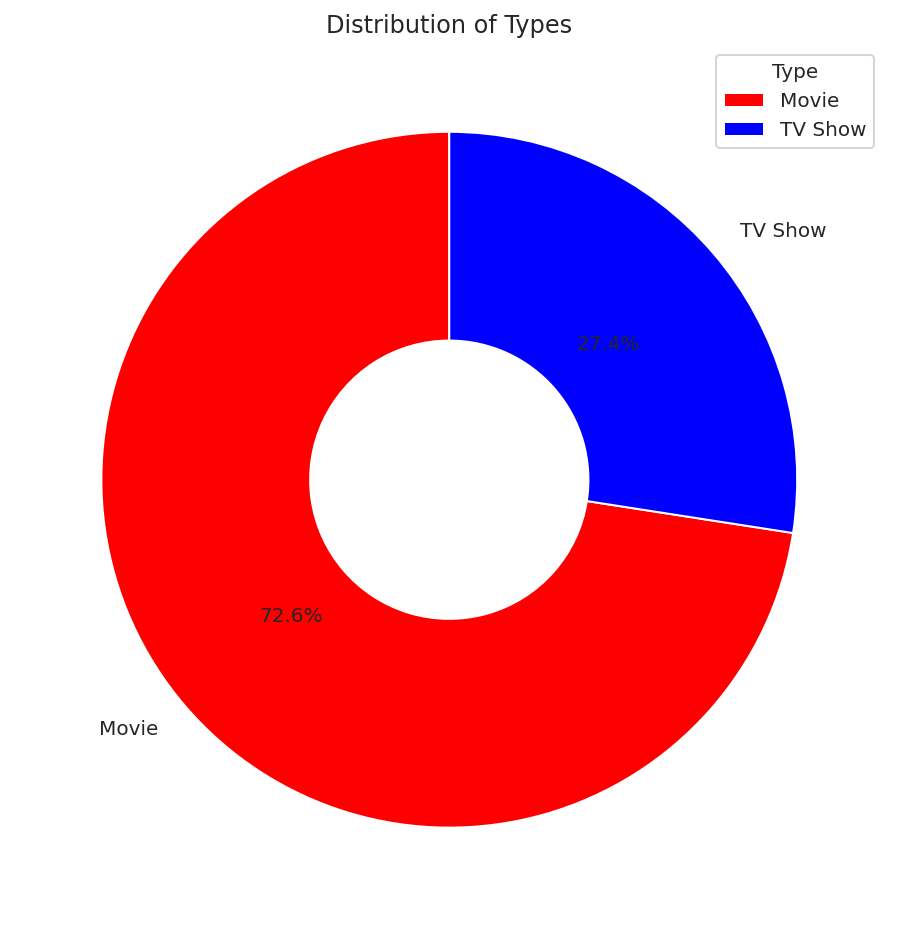

In [50]:
type_counts = df_copy['type'].value_counts()

# 원그래프 색상 설정
colors = {'Movie': 'red', 'TV Show': 'blue'}

# 도넛 그래프 그리기
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    type_counts,
    colors=[colors[t] for t in type_counts.index],  # 색상 매핑
    autopct='%1.1f%%',
    startangle=90,
    labels=type_counts.index,
    wedgeprops=dict(width=0.6)  # 도넛 모양을 위해 width 설정
)

# 범례 추가
plt.legend(wedges, type_counts.index, title="Type", loc='upper right')
plt.title('Distribution of Types')
plt.show()

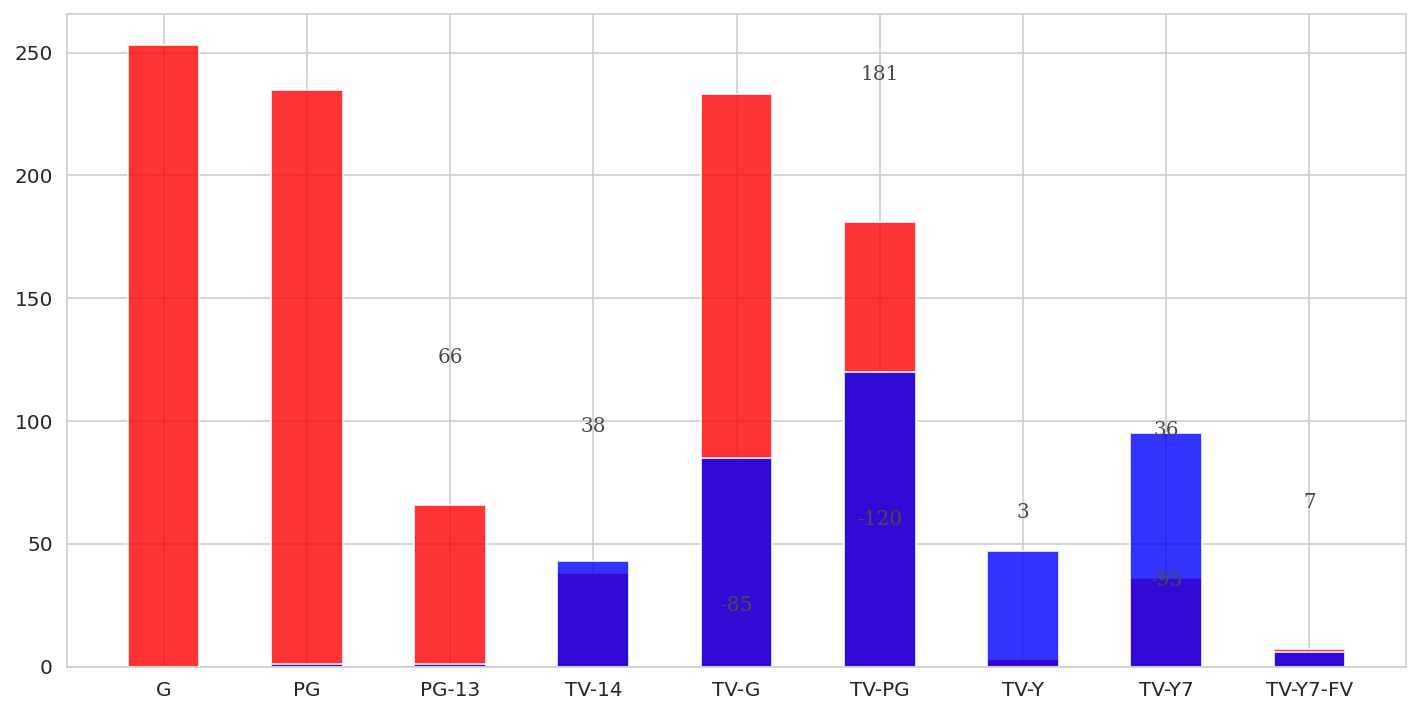

In [51]:
mf = df_copy.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)

movie = mf.loc['Movie']
tv = mf.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='red', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='blue', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

In [52]:
counts = df_copy.groupby(['rating']).size().reset_index(name='count')
print(counts)

     rating  count
0         G    253
1        PG    236
2     PG-13     67
3     TV-14     81
4      TV-G    318
5     TV-PG    301
6      TV-Y     50
7     TV-Y7    131
8  TV-Y7-FV     13


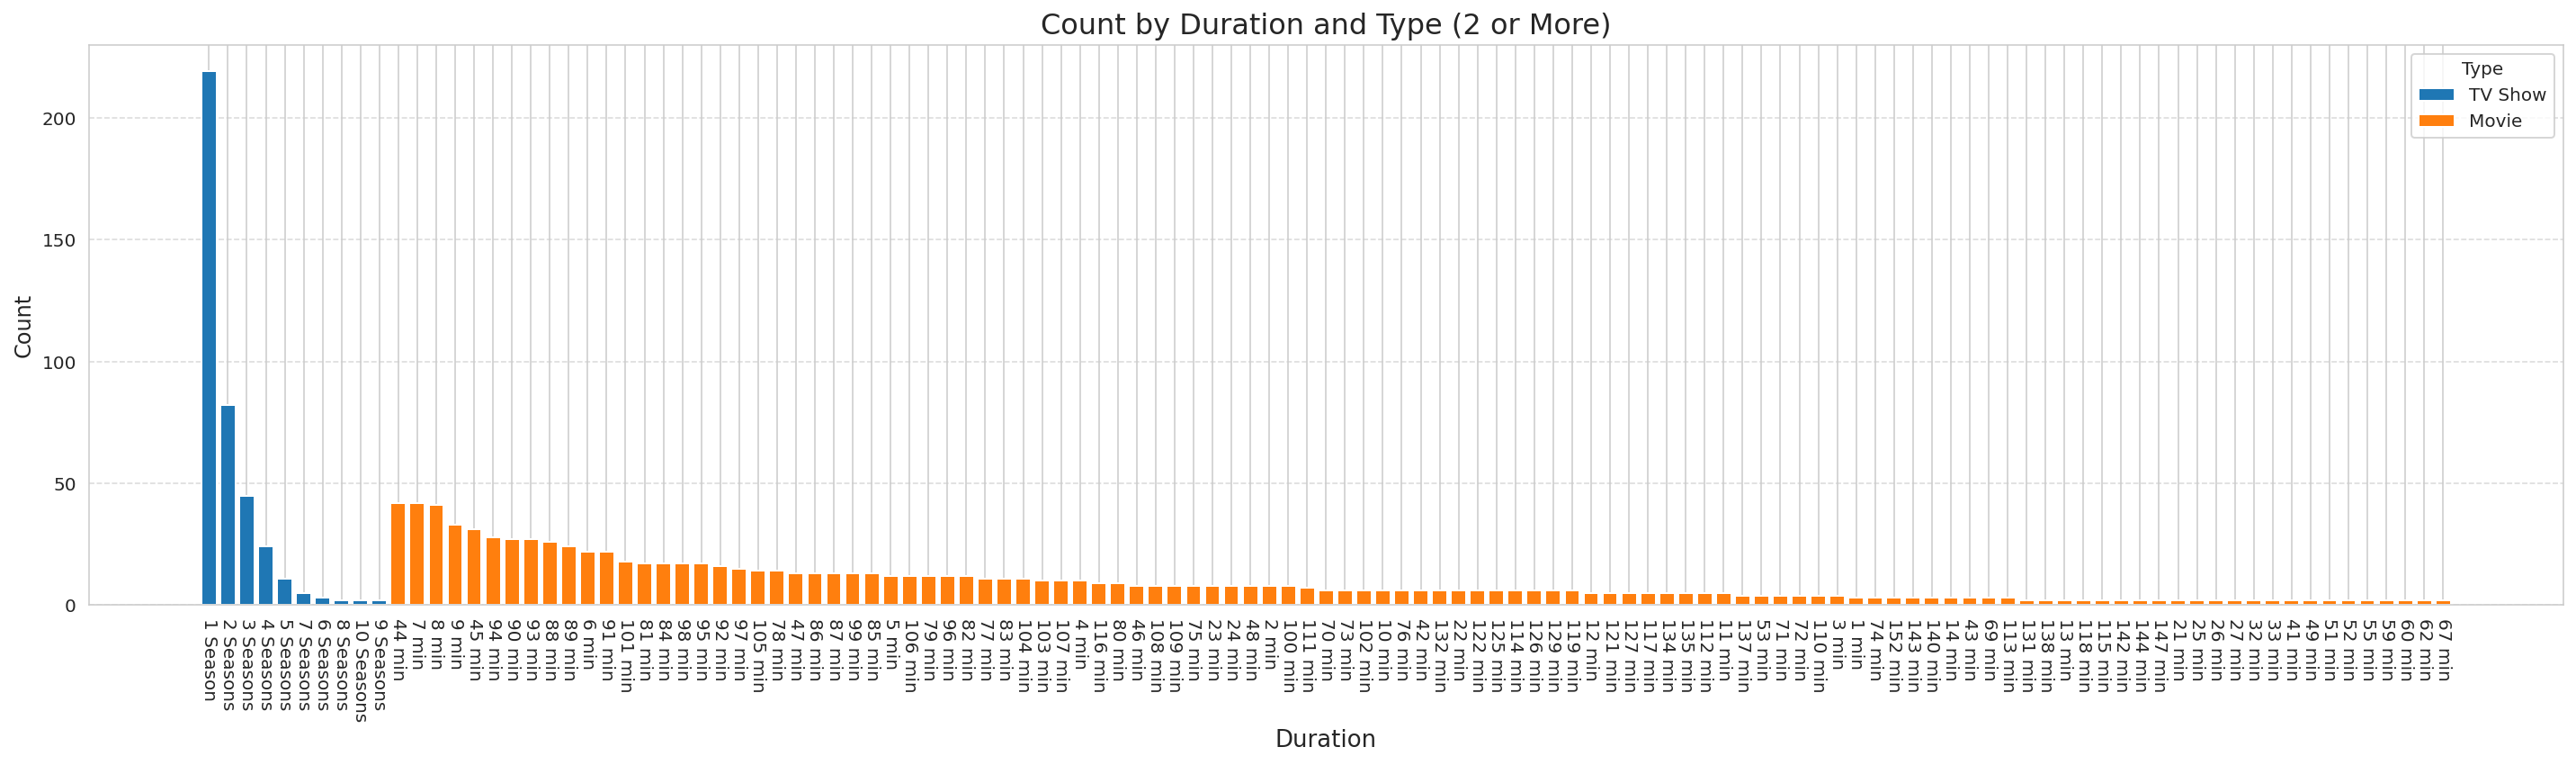

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# duration과 type별 데이터 개수 계산
grouped_data = df_copy.groupby(['type', 'duration']).size().reset_index(name='count')

# 2개 이상인 데이터만 필터링
filtered_data = grouped_data[grouped_data['count'] >= 2]

# type별로 개수를 기준으로 정렬
sorted_data = filtered_data.sort_values(by='count', ascending=False)

# 그래프 그리기
plt.figure(figsize=(20, 6))
for t in sorted_data['type'].unique():
    data = sorted_data[sorted_data['type'] == t]
    plt.bar(data['duration'], data['count'], label=t)

# 그래프 꾸미기
plt.title('Count by Duration and Type (2 or More)', fontsize=16)
plt.xlabel('Duration', fontsize=13)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=270)  # x축 라벨 회전
plt.legend(title='Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축에 그리드 추가
plt.tight_layout()  # 레이아웃 조정

# 그래프 표시
plt.show()

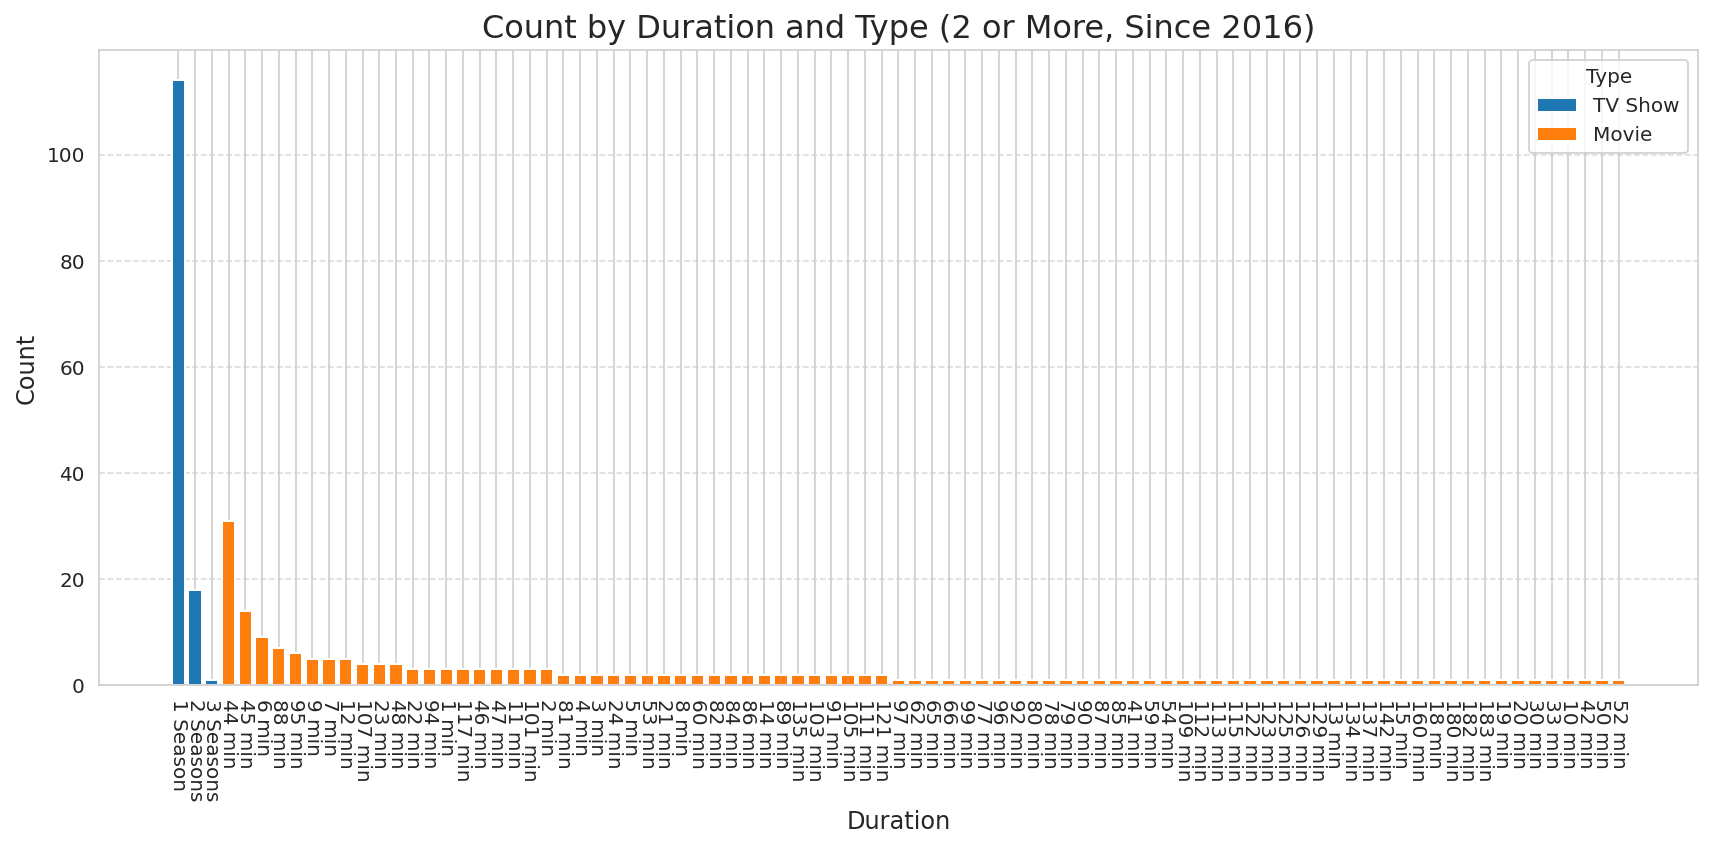

In [89]:
filtered_df = df_copy[df_copy['release_year'] >= 2019]

# duration과 type별 데이터 개수 계산
grouped_data = filtered_df.groupby(['type', 'duration']).size().reset_index(name='count')

# 2개 이상인 데이터만 필터링
filtered_data = grouped_data[grouped_data['count'] >= 1]

# type별로 개수를 기준으로 정렬
sorted_data = filtered_data.sort_values(by='count', ascending=False)

# 그래프 그리기
plt.figure(figsize=(12, 6))
for t in sorted_data['type'].unique():
    data = sorted_data[sorted_data['type'] == t]
    plt.bar(data['duration'], data['count'], label=t)

# 그래프 꾸미기
plt.title('Count by Duration and Type (2 or More, Since 2016)', fontsize=16)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=270)  # x축 라벨 회전
plt.legend(title='Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축에 그리드 추가
plt.tight_layout()  # 레이아웃 조정

# 그래프 표시
plt.show()

In [54]:
df_copy['family-friendly'] = '1'

In [55]:
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,family-friendly
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,1
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,1
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,1
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",1
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1


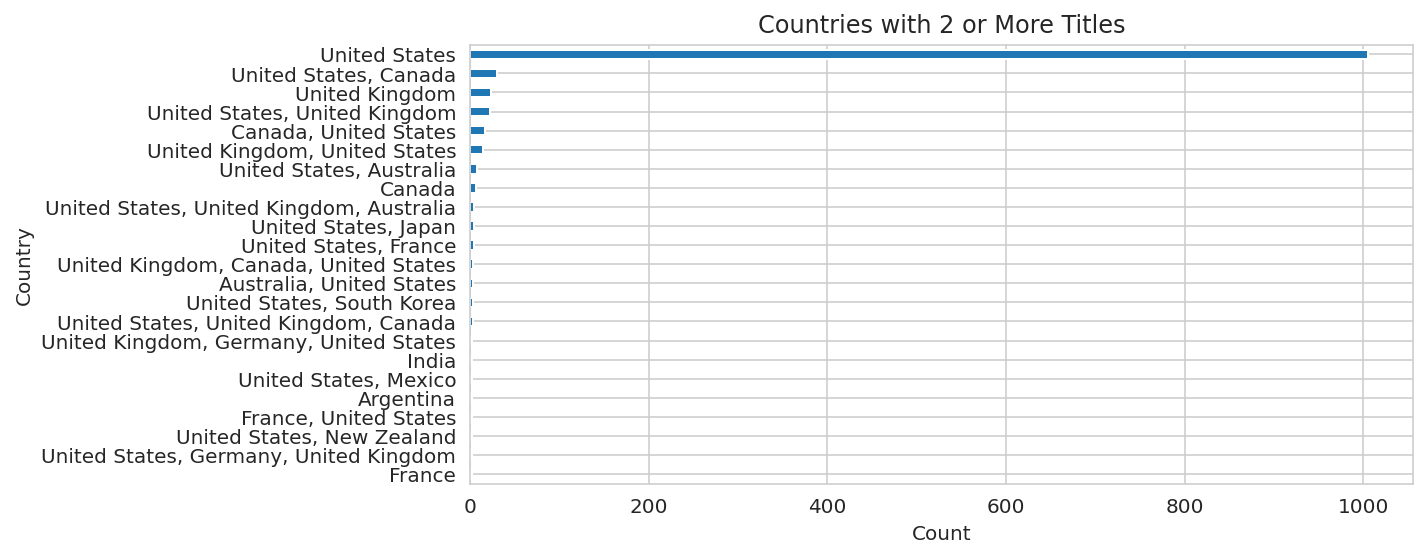

In [56]:
# 'country' 컬럼 값의 개수를 계산
country_counts = df_copy['country'].value_counts()

# 2편 이상인 국가 필터링
filtered_country_counts = country_counts[country_counts >= 2]

# 옆으로 눕힌 막대 그래프 (역순 정렬)
plt.figure(figsize=(10, 4))
filtered_country_counts.sort_values(ascending=True).plot(kind='barh')

# 그래프 꾸미기
plt.title('Countries with 2 or More Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()  # 레이아웃 조정
plt.show()

/tmp/ipykernel_31/2392346239.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()  # 레이아웃 조정


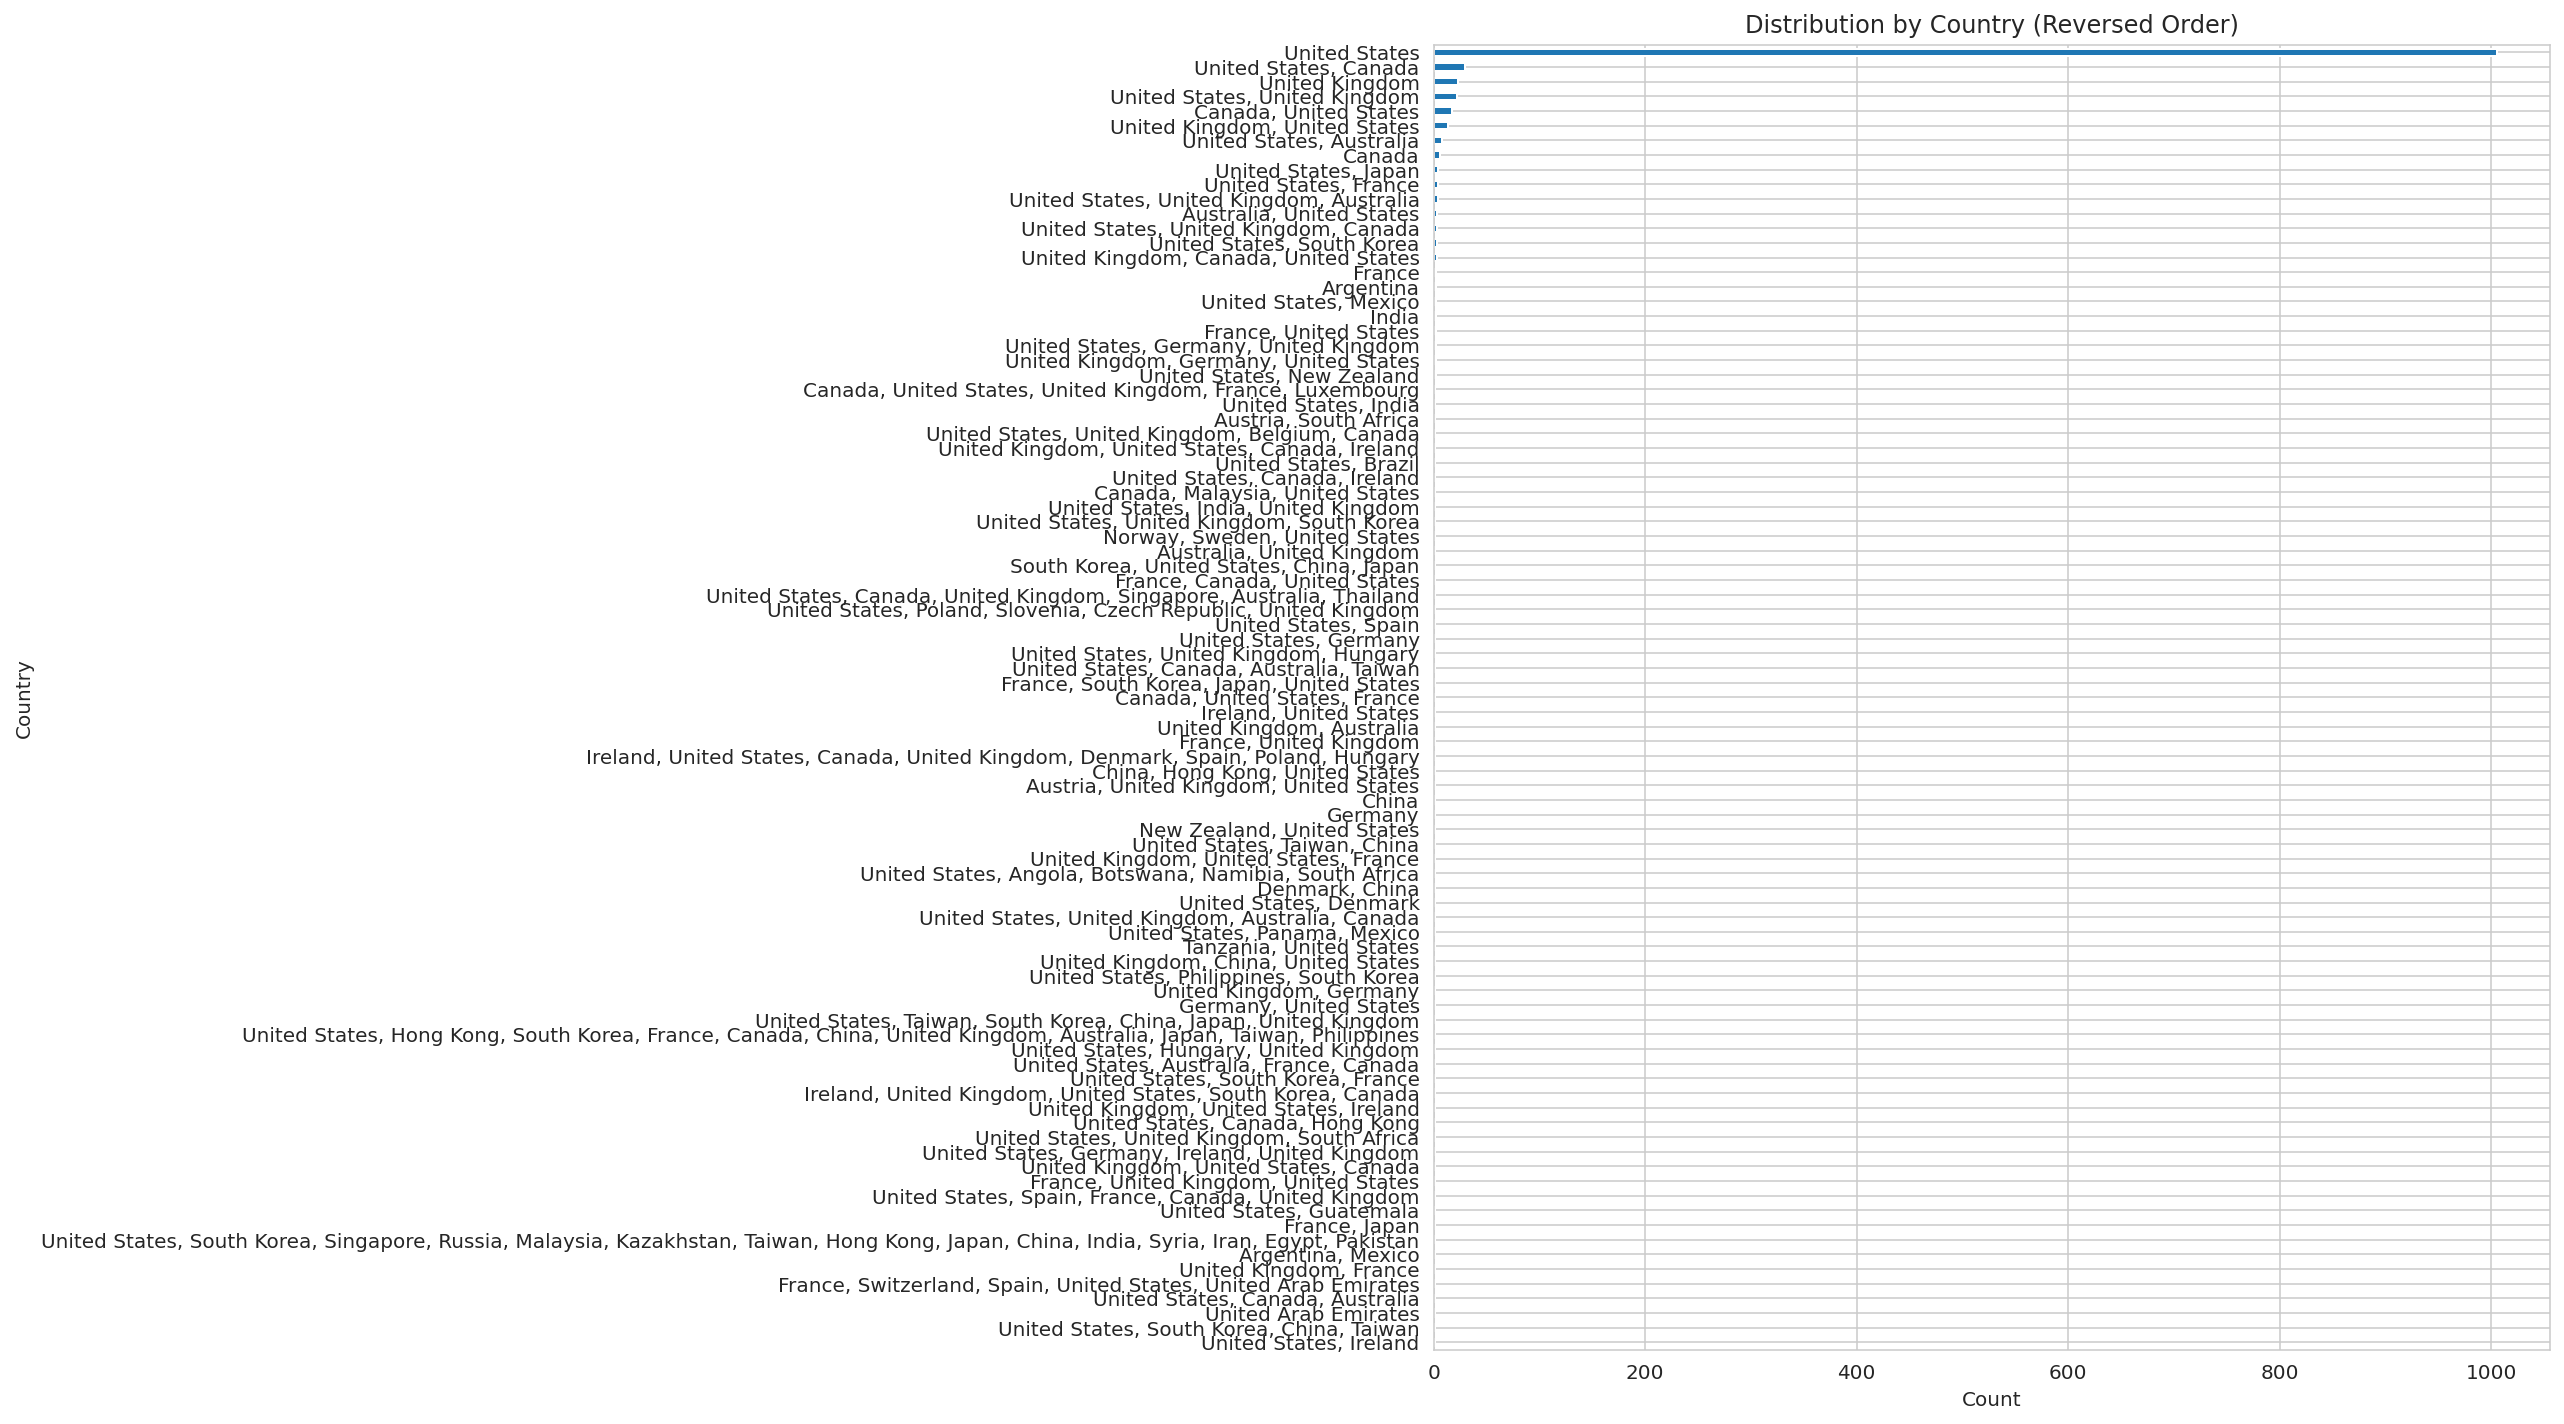

In [57]:
country_counts = df_copy['country'].value_counts(ascending=True)

# 옆으로 눕힌 막대 그래프 (역순)
plt.figure(figsize=(10, 12))
country_counts.plot(kind='barh')

# 그래프 꾸미기
plt.title('Distribution by Country (Reversed Order)')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()  # 레이아웃 조정
plt.show()

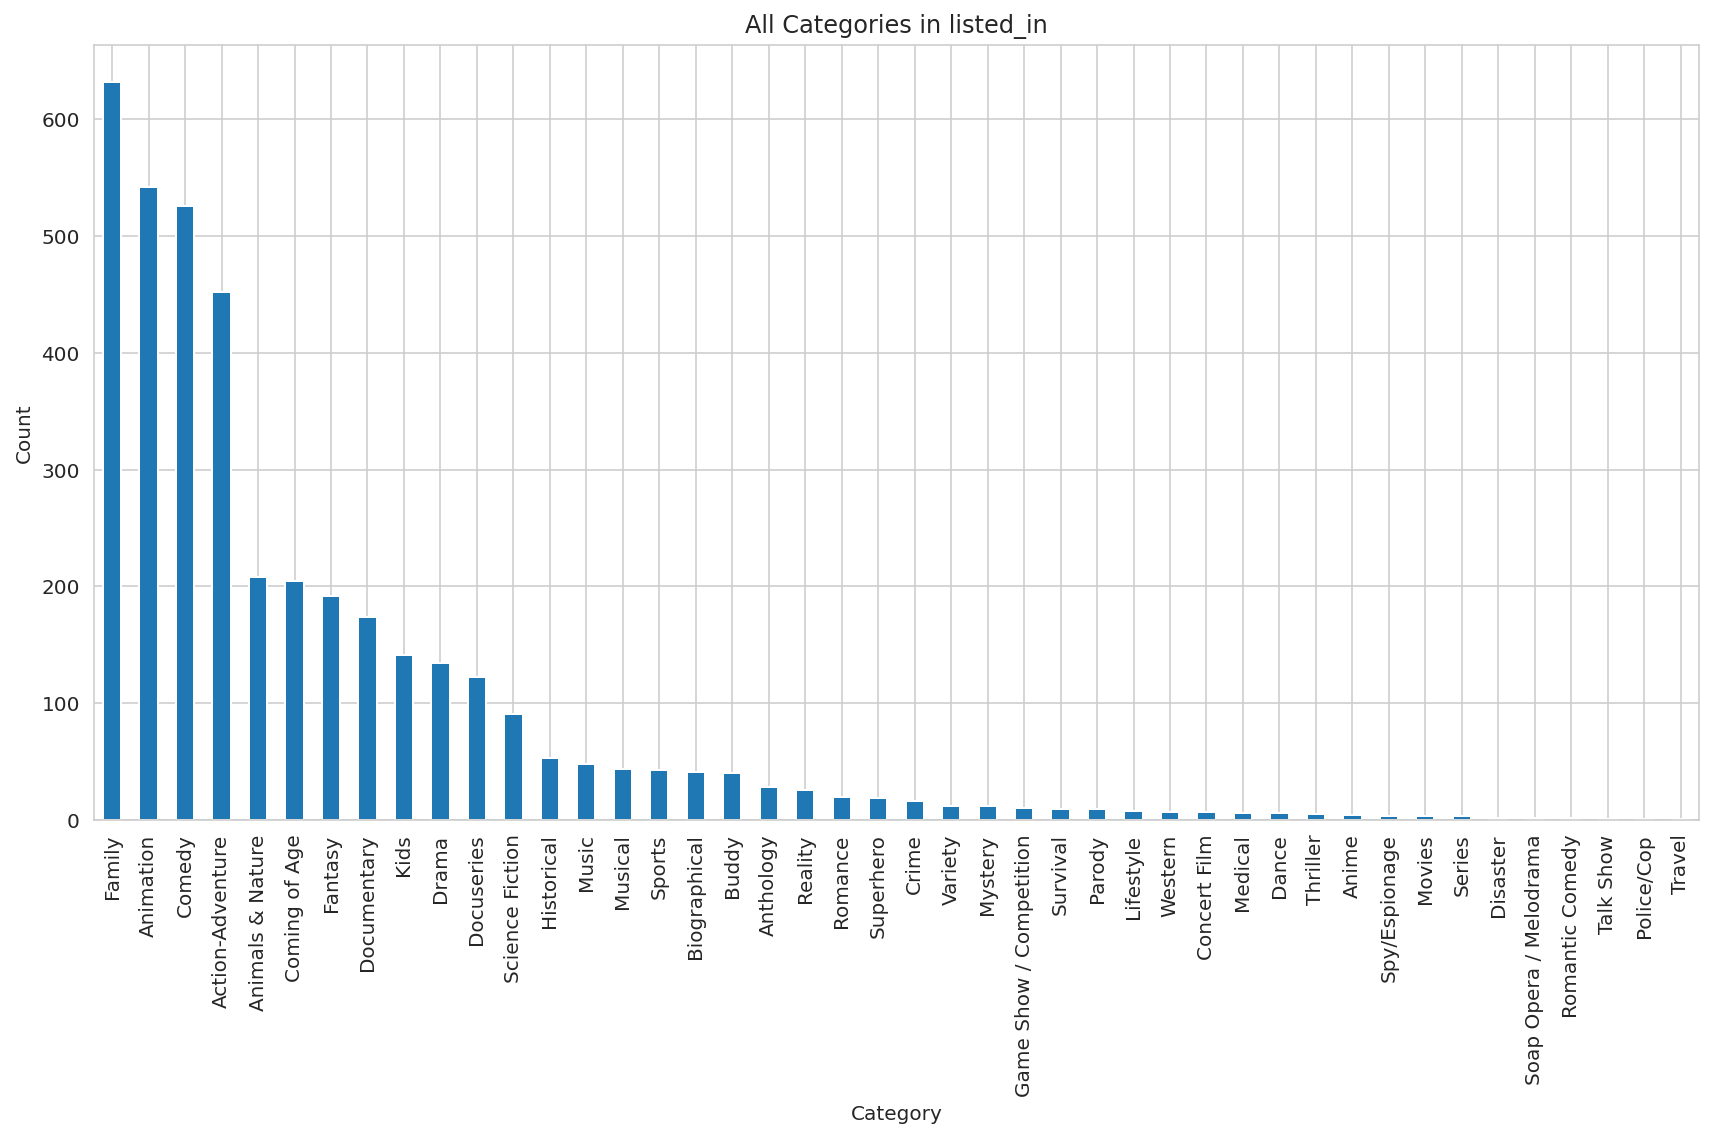

In [58]:
# 'listed_in'에서 카테고리를 세미콜론으로 나누고 모든 카테고리를 한 리스트로 확장
categories = df_copy['listed_in'].str.split(', ').explode()

# 카테고리별 개수 계산
category_counts = categories.value_counts()

# 모든 카테고리를 보여주는 세로 막대 그래프
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')

# 그래프 꾸미기
plt.title('All Categories in listed_in')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

<Figure size 864x576 with 0 Axes>

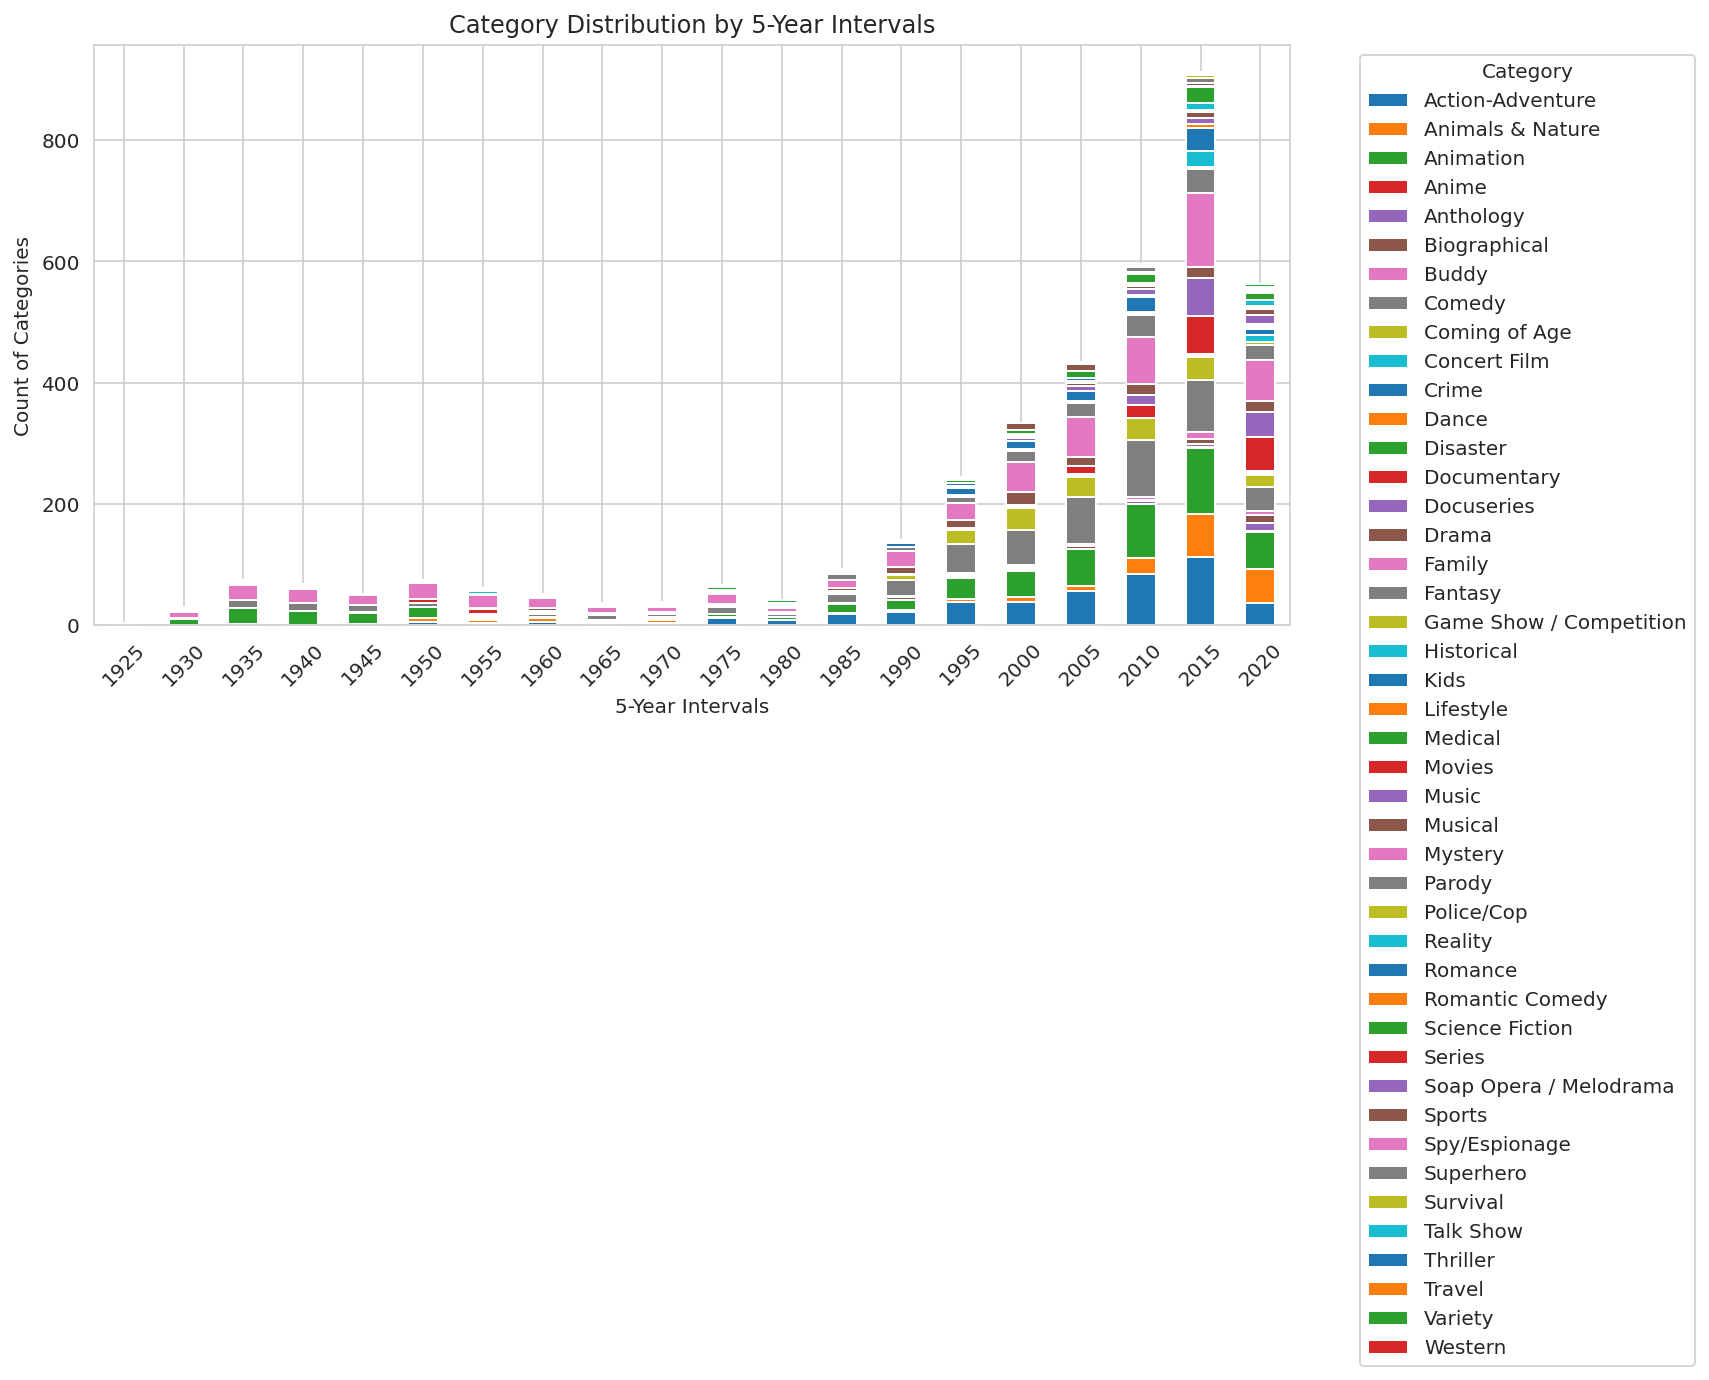

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# 'listed_in'에서 카테고리를 쉼표로 나누고 확장
df_copy_exploded = df_copy.assign(listed_in=df_copy['listed_in'].str.split(', ')).explode('listed_in')

# Release year를 5년 단위로 그룹화하기 위한 범위 생성
df_copy_exploded['year_group'] = (df_copy_exploded['release_year'] // 5) * 5

# 5년 단위와 카테고리별로 그룹화하여 개수 계산
category_per_group = df_copy_exploded.groupby(['year_group', 'listed_in']).size().unstack(fill_value=0)

# 그래프 그리기
plt.figure(figsize=(12, 8))
category_per_group.plot(kind='bar', stacked=True, figsize=(12, 8))

# 그래프 꾸미기
plt.title('Category Distribution by 5-Year Intervals')
plt.xlabel('5-Year Intervals')
plt.ylabel('Count of Categories')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 옆으로 이동
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [60]:
set(df_copy['family-friendly'])

{'1'}

In [61]:
df_copy['mature'] = '0'

In [62]:
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,family-friendly,mature
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,1,0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,1,0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,1,0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",1,0
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1,0


In [63]:
df_copy.drop(columns=['family-friendly'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mature
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",0
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,0
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,0
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",0
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,0


In [64]:
df_copy = df_copy.drop(columns=['mature'])

In [65]:
df_copy = df_copy.drop(columns=['family-friendly'])


In [66]:
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [67]:
df_copy['is_family_friendly'] = 'True'

In [68]:
df_copy.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,is_family_friendly
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,True
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,True
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,True
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",True
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,True


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# 'date_added'를 날짜 형식으로 변환
df_copy['date_added'] = pd.to_datetime(copy_data['date_added'], errors='coerce')

# 'date_added'를 기준으로 월별 데이터 집계
monthly_data = copy_data['date_added'].dt.to_period('M').value_counts().sort_index()

# 월별 데이터 집계를 시리즈에서 데이터프레임으로 변환
monthly_data_df = monthly_data.reset_index()
monthly_data_df.columns = ['Month', 'Count']

# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_df['Month'].astype(str), monthly_data_df['Count'], marker='o', linestyle='-')

# 그래프 레이블과 제목 설정
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Entries Added by Month')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()


NameError: name 'copy_data' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'date_added'를 날짜 형식으로 변환
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'], errors='coerce')

# 'date_added'에서 월 단위 추출 및 'type'별 데이터 집계
df_copy['Month'] = df_copy['date_added'].dt.to_period('M')
type_monthly_data = df_copy.groupby(['Month', 'type']).size().unstack(fill_value=0)

# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 6))
for column in type_monthly_data.columns:
    plt.plot(
        type_monthly_data.index.astype(str),  # x축 값
        type_monthly_data[column],           # y축 값
        marker='o',
        label=column                         # 'type' 값
    )

# 그래프 레이블과 제목 설정
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Entries Added by Month and Type')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='Type')
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()


In [ ]:
# 'date_added'를 날짜 형식으로 변환
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'], errors='coerce')

# 'date_added'에서 월 단위 추출 및 'type'별 데이터 집계
df_copy['Month'] = df_copy['date_added'].dt.to_period('M')
type_monthly_data = df_copy.groupby(['Month', 'type']).size().unstack(fill_value=0)

# 2019년 12월 이후 데이터 필터링
filtered_data = type_monthly_data[type_monthly_data.index >= '2019-12']

# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 6))
for column in filtered_data.columns:
    plt.plot(
        filtered_data.index.astype(str),  # x축 값
        filtered_data[column],           # y축 값
        marker='o',
        label=column                     # 'type' 값
    )

# 그래프 레이블과 제목 설정
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Entries Added by Month and Type (From Dec 2019)')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='Type')
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
# 'date_added'를 날짜 형식으로 변환
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'], errors='coerce')

# 'date_added'에서 분기 단위 추출 및 'rating'별 데이터 집계
df_copy['Quarter'] = df_copy['date_added'].dt.to_period('Q')
rating_quarterly_data = df_copy.groupby(['Quarter', 'rating']).size().unstack(fill_value=0)

# 2019년 12월 이후 데이터 필터링
filtered_quarterly_data = rating_quarterly_data[rating_quarterly_data.index >= '2020Q1']

# 분기별 'rating' 수량 꺾은선 그래프 그리기
plt.figure(figsize=(12, 6))
for column in filtered_quarterly_data.columns:
    plt.plot(
        filtered_quarterly_data.index.astype(str),  # x축 값
        filtered_quarterly_data[column],           # y축 값
        marker='o',
        label=column                               # 'rating' 값
    )

# 그래프 레이블과 제목 설정
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Quarterly Rating Counts (From Q1 2020)')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()